In [528]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import shap
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

# Data preparing

In [529]:
data = pd.read_csv('./data/data.csv')

In [530]:
data['Difference of inflation'] = data['Food Inflation Rate'] - data['Overall Inflation Rate']

Uncomment this code for encoding with binary encoder

In [531]:
# binary_encoder = ce.BinaryEncoder(cols=['Item', 'Area'])
# data=binary_encoder.fit_transform(data)

In [532]:
numerical_columns = ['Food Inflation Rate', 'Raw GDP', 'GDP Growth Rate', 'Item Price Per Tonne',
                     'Overall Inflation Rate', 'Year', 'Difference of inflation']

In [533]:
label_encoder = LabelEncoder()

Uncomment this code for encoding with label encoder

In [534]:
data['Item'] = label_encoder.fit_transform(data['Item'])
data['Area'] = label_encoder.fit_transform(data['Area'])
numerical_columns.append('Item')
numerical_columns.append('Area')

In [535]:
numerical_columns

['Food Inflation Rate',
 'Raw GDP',
 'GDP Growth Rate',
 'Item Price Per Tonne',
 'Overall Inflation Rate',
 'Year',
 'Difference of inflation',
 'Item',
 'Area']

In [536]:
scaler = RobustScaler()

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [537]:
data.head()

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation
0,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-1.000000,-0.299190,0.708333,-0.704691
1,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.986667,-0.229156,0.708333,-0.704691
2,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.906667,-0.330420,0.708333,-0.704691
3,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.893333,0.395618,0.708333,-0.704691
4,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.813333,-0.396085,0.708333,-0.704691


# KMeans and dimensionality reduction

In [538]:
pca = PCA(2)

data_pca = pca.fit_transform(data)
data_pca

array([[ 0.07979987, -1.24697817],
       [ 0.07617205, -1.24037473],
       [ 0.08170355, -1.25006348],
       ...,
       [-1.02308668,  1.21774295],
       [-0.62658774,  0.50164457],
       [-0.53754852,  0.34091324]])

In [539]:
kmeans = KMeans()
kmeans.fit(data_pca)
clusters = kmeans.labels_.tolist()

In [540]:
label = kmeans.fit_predict(data_pca)

u_labels = np.unique(label)

labels = kmeans.labels_
u_labels

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

# Visualization of KMeans clustering

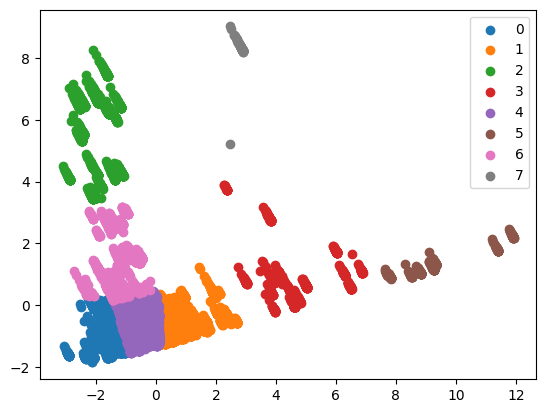

In [541]:
for i in u_labels:
    plt.scatter(data_pca[label == i , 0] , data_pca[label == i , 1] , label = i)
plt.legend()

In [542]:
data['label']=labels

In [543]:
data.head()

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation,label
0,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-1.000000,-0.299190,0.708333,-0.704691,4
1,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.986667,-0.229156,0.708333,-0.704691,4
2,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.906667,-0.330420,0.708333,-0.704691,4
3,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.893333,0.395618,0.708333,-0.704691,4
4,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.813333,-0.396085,0.708333,-0.704691,4


# Model training and evaluation

In [544]:
X, Y = data.drop(columns=['label']), data['label']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [545]:
classifier = RandomForestClassifier(
    n_estimators=3,
    max_depth=2,
    max_features='sqrt',
    random_state=42
)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=3, random_state=42)

In [546]:
y_pred = classifier.predict(x_test)

In [547]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       488
           1       0.91      0.86      0.88       931
           2       0.00      0.00      0.00         0
           3       1.00      0.58      0.74       237
           4       0.96      0.68      0.80      1474
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.77      3130
   macro avg       0.48      0.38      0.42      3130
weighted avg       0.94      0.77      0.84      3130



/Users/filipsamardziski/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/filipsamardziski/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/filipsamardziski/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [548]:
data[numerical_columns].head()

,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item Price Per Tonne,Overall Inflation Rate,Year,Difference of inflation,Item,Area
0,0.160705,-0.422628,-0.784202,-0.299190,0.708333,-0.833333,-0.704691,-1.000000,-0.941176
1,0.160705,-0.422628,-0.784202,-0.229156,0.708333,-0.833333,-0.704691,-0.986667,-0.941176
2,0.160705,-0.422628,-0.784202,-0.330420,0.708333,-0.833333,-0.704691,-0.906667,-0.941176
3,0.160705,-0.422628,-0.784202,0.395618,0.708333,-0.833333,-0.704691,-0.893333,-0.941176
4,0.160705,-0.422628,-0.784202,-0.396085,0.708333,-0.833333,-0.704691,-0.813333,-0.941176


In [549]:
data[numerical_columns] = scaler.inverse_transform(data[numerical_columns])

In [550]:
data.head()

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation,label
0,0.0,2012.0,2.404087,12319.779604,-4.430218,2.0,369.7,3.2,-0.795913,4
1,0.0,2012.0,2.404087,12319.779604,-4.430218,3.0,489.9,3.2,-0.795913,4
2,0.0,2012.0,2.404087,12319.779604,-4.430218,9.0,316.1,3.2,-0.795913,4
3,0.0,2012.0,2.404087,12319.779604,-4.430218,10.0,1562.2,3.2,-0.795913,4
4,0.0,2012.0,2.404087,12319.779604,-4.430218,16.0,203.4,3.2,-0.795913,4


In [551]:
# Uncomment this code for inverse transform with label encoder
data['Area'] = data['Area'].astype(int)
data['Area'] = label_encoder.inverse_transform(data['Area'])

Most occurrences of food fraud
Works with inversed values from label encoder

In [552]:
data.groupby(['Area', 'Year'])['label'].sum()

Area         Year  
Albania      2012.0    236
             2013.0     58
             2014.0    224
             2015.0     54
             2016.0     56
                      ... 
Switzerland  2018.0    322
             2019.0    332
             2020.0    350
             2021.0     66
             2022.0    396
Name: label, Length: 340, dtype: int32

In [553]:
data.head()

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation,label
0,Albania,2012.0,2.404087,12319.779604,-4.430218,2.0,369.7,3.2,-0.795913,4
1,Albania,2012.0,2.404087,12319.779604,-4.430218,3.0,489.9,3.2,-0.795913,4
2,Albania,2012.0,2.404087,12319.779604,-4.430218,9.0,316.1,3.2,-0.795913,4
3,Albania,2012.0,2.404087,12319.779604,-4.430218,10.0,1562.2,3.2,-0.795913,4
4,Albania,2012.0,2.404087,12319.779604,-4.430218,16.0,203.4,3.2,-0.795913,4


# SHAP explainability

In [554]:
explainer = shap.Explainer(classifier)

shap_values = explainer(x_test)

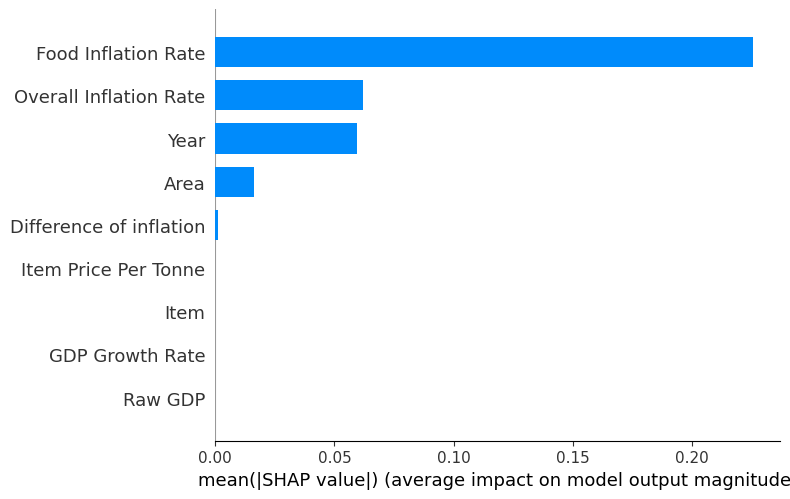

In [555]:
shap.summary_plot(shap_values[:, :, 1], x_test, plot_type="bar")

In [556]:
shap_values_array = shap_values.values
feature_names = x_train.columns
shap.dependence_plot('Overall Inflation Rate', shap_values_array, x_train,feature_names=feature_names)

IndexError: index 8782 is out of bounds for axis 0 with size 3130

In [ ]:
shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], x_train.iloc[0])